In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE

In [26]:
# load the cleaned DataFrame
cleaned_df = pd.read_csv("/Users/sa18/Desktop/Financial_Fraud/cleaned_data.csv")

In [27]:
#Train-Test-Split. Split data into training and testing sets: separate features from target, with "isFraud" as the target variable
X = cleaned_df.drop(columns=["isFraud"]) # drop 'isFraud' from DataFrame
y = cleaned_df["isFraud"]  # add 'isFraud' as target

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [28]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [29]:
# Normalize data with StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [30]:
# excited to see shape of samples and features for X_train and X_test!
X_train_res.shape, X_test.shape

((10167052, 9), (1272524, 9))

In [31]:
# check data types for X_train
X_train.dtypes

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
type_CASH_OUT       int64
type_DEBIT          int64
type_PAYMENT        int64
type_TRANSFER       int64
dtype: object

In [32]:
# Define Confusion Matrix Plotting Function
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

## Logistic Regression

In [33]:
# Train Logistic Regression Model
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_res, y_train_res)

#LogisticRegression()

LogisticRegression(class_weight='balanced')

In [34]:
# Predictions & Evaluation
y_pred_logreg = logreg.predict(X_test)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression F1_Score: ", f1_logreg)

Logistic Regression F1_Score:  0.04354398080736642


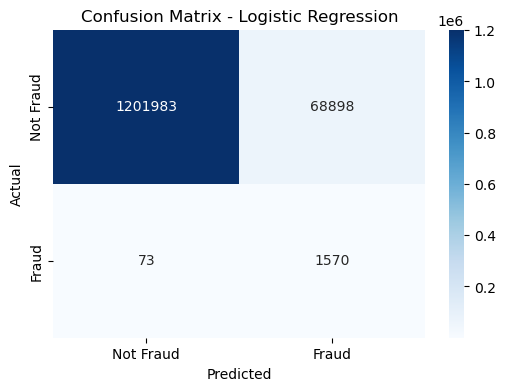

In [35]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

In [36]:
# Classification Report
print("Classification Report: Logistic Regression: ")
print(classification_report(y_test, y_pred_logreg))

Classification Report: Logistic Regression: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [37]:
# ROC Curve

# get predicted probabilities for Logistic Regression Model
probs_logreg = logreg.predict_proba(X_test)[:, 1] # probabilities for the positive class

# calculate ROC Curve values: false positive rates & true positive rates
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, probs_logreg)

# calculate Area Under the Curve (AUC)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

print(f"Logistic Regression AUC: {roc_auc_logreg: .4f}")

Logistic Regression AUC:  0.9904


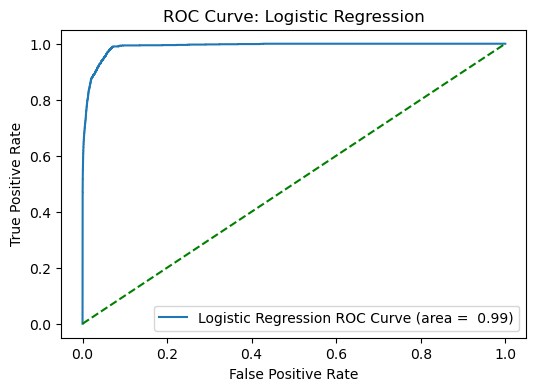

In [45]:
# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression ROC Curve (area = {roc_auc_logreg: .2f})')
plt.plot([0,1], [0,1], linestyle='--', color='green') # diagonal line for random classfier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [39]:
# Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)

GaussianNB()

In [40]:
# Predictions & Evaluations
y_pred_nb = nb_model.predict(X_test)
f1_nb_model = f1_score(y_test, y_pred_nb)

print("Naive Bayes F1 Score: ", f1_nb_model)

Naive Bayes F1 Score:  0.003978301057084501


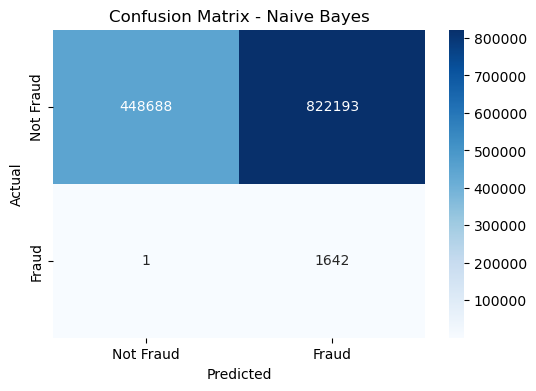

In [41]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

In [42]:
# Classification Report
print("Classification Report: Naive Bayes: ")
print(classification_report(y_test, y_pred_nb))

Classification Report: Naive Bayes: 
              precision    recall  f1-score   support

           0       1.00      0.35      0.52   1270881
           1       0.00      1.00      0.00      1643

    accuracy                           0.35   1272524
   macro avg       0.50      0.68      0.26   1272524
weighted avg       1.00      0.35      0.52   1272524



In [48]:
# ROC Curve

probs_nb = nb_model.predict_proba(X_test)[:, 1] # probabilities for the positive class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

print(f"Naive Bayes AUC: {roc_auc_nb:.4f}")

Naive Bayes AUC: 0.9121


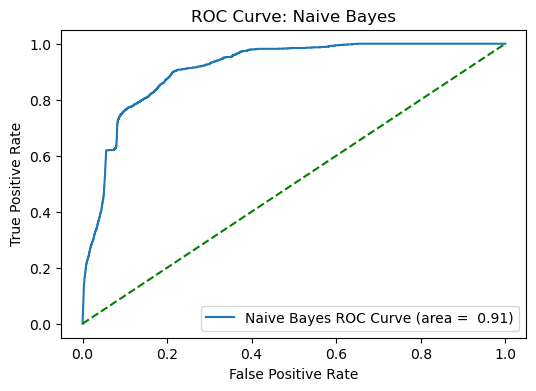

In [51]:
# Plot ROC Curve

plt.figure(figsize=(6,4))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes ROC Curve (area = {roc_auc_nb: .2f})')
plt.plot([0,1], [0,1], linestyle='--', color='green') # diagonal line for random classfier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Naive Bayes')
plt.legend(loc='lower right')
plt.show()

## Compare Logistic Regression, Naive Bayes & SVM Models

In [52]:
# Evaluate the models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')
    print(f'{name} - Precision: {precision:.4f}')
    print(f'{name} - Recall: {recall:.4f}')
    print(f'{name} - F1_Score: {f1:.4f}')

In [53]:
# Print evaluation results
evaluate_model('Logistic Regression', y_test, y_pred_logreg)
evaluate_model('Naive Bayes', y_test, y_pred_nb)
#evaluate_model('SVM', y_test, y_pred_svm)

Logistic Regression - Accuracy: 0.9458
Logistic Regression - Precision: 0.0223
Logistic Regression - Recall: 0.9556
Logistic Regression - F1_Score: 0.0435
Naive Bayes - Accuracy: 0.3539
Naive Bayes - Precision: 0.0020
Naive Bayes - Recall: 0.9994
Naive Bayes - F1_Score: 0.0040


In [ ]:
# Classification Reports
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("CLassification Report - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
#print("Classification Report - SVM:")
#print(classification_report(y_test, y_pred_svm))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

CLassification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.35      0.52   1270881
           1       0.00      1.00      0.00      1643

    accuracy                           0.35   1272524
   macro avg       0.50      0.68      0.26   1272524
weighted avg       1.00      0.35      0.52   1272524



## SVM

In [ ]:
# SVM taking hours to run, so retrying with a smaller subset of resampled data for faster training
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_res, y_train_res, test_size=0.9, random_state=42, stratify=y_train_res)

# Train SVM Model on smaller subset
svm_model = SVC(kernel='linear, random_state=42')
svm_model.fit(X_train_sample, y_train_sample)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1 Score: ", f1_svm_model)

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

# Classification Report
print("Classification Report: SVM")
print(classification_report(y_test, y_pred_svm))

# ROC Curve
probs_svm = svm.model.predict(X_test)[:, 1]
fpr_svm, trp_svm = roc_curve(y_test, probs_svm)
roc_auc_svm = auc(fpr_svm, trp_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC Curve (area = {roc_auc_svm: .2f})')